In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [155]:
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [156]:
df['Serving Size Oz'] = df['Serving Size'].str.extract(r'(\d+\.?\d*)\s*(?:fl\s*)?oz').astype(float)

In [157]:
# modus = df['Serving Size Oz'].mode().iloc[0]

In [158]:
# df['Serving Size Oz'] = df['Serving Size Oz'].fillna(modus)

In [159]:
target_col = df[['Serving Size Oz', 'Calories', 'Total Fat']]

# Soal 1

## Mean

In [160]:
target_col.mean()

Serving Size Oz     12.987500
Calories           368.269231
Total Fat           14.165385
dtype: float64

## Median

In [161]:
target_col.median()

Serving Size Oz     12.0
Calories           340.0
Total Fat           11.0
dtype: float64

## Modus

In [162]:
target_col.mode().iloc[0]

Serving Size Oz    16.0
Calories            0.0
Total Fat           0.0
Name: 0, dtype: float64

## Range

In [163]:
target_col.max() - target_col.min()

Serving Size Oz      31.0
Calories           1880.0
Total Fat           118.0
dtype: float64

## Q1

In [164]:
target_col.quantile(0.25)

Serving Size Oz      7.075
Calories           210.000
Total Fat            2.375
Name: 0.25, dtype: float64

## Q3

In [165]:
target_col.quantile(0.75)

Serving Size Oz     16.00
Calories           500.00
Total Fat           22.25
Name: 0.75, dtype: float64

## IQR

In [166]:
target_col.quantile(0.75) - target_col.quantile(0.25)

Serving Size Oz      8.925
Calories           290.000
Total Fat           19.875
dtype: float64

## Standar Deviasi

In [167]:
target_col.std()

Serving Size Oz      6.951755
Calories           240.269886
Total Fat           14.205998
dtype: float64

## Variiance

In [168]:
target_col.var()

Serving Size Oz       48.326902
Calories           57729.618355
Total Fat            201.810380
dtype: float64

## Z-score tiap data

In [169]:
(target_col - target_col.mean()) / target_col.std()

,Serving Size Oz,Calories,Total Fat
0,-1.177760,-0.284136,-0.082035
1,-1.177760,-0.492235,-0.433999
2,-1.307224,0.007203,0.621893
3,-1.048296,0.340162,0.973857
4,-1.048296,0.132063,0.621893
...,...,...,...
255,-0.415363,0.589882,0.199537
256,0.059338,1.339039,0.621893
257,-0.904448,-0.117656,-0.222820
258,0.174416,1.838477,1.255429


# Soal 2

## Outlier dengan IQR

In [170]:
for col in target_col.columns:
    q1 = target_col[col].quantile(0.25)
    q3 = target_col[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    outliers_iqr = target_col[(target_col[col] < lwr) | (target_col[col] > upr)]

In [171]:
outliers_iqr

,Serving Size Oz,Calories,Total Fat
31,14.8,1090,56.0
32,15.3,1150,60.0
81,11.4,940,59.0
82,22.8,1880,118.0


## Outlier dengan Z-score

In [172]:
for col in target_col.columns:
    mean_val = target_col[col].mean()
    std_val = target_col[col].std()
    z_scores = (target_col[col] - mean_val) / std_val
    outliers_z = target_col[np.abs(z_scores) > 2]

In [173]:
outliers_z

,Serving Size Oz,Calories,Total Fat
27,9.5,740,48.0
28,10.0,800,52.0
31,14.8,1090,56.0
32,15.3,1150,60.0
33,14.9,990,46.0
34,15.4,1050,50.0
47,10.0,750,43.0
81,11.4,940,59.0
82,22.8,1880,118.0


# Soal 3

## Visualiasi Boxplot

In [174]:
categories = ["Coffee & Tea", "Breakfast", "Chicken & Fish", "Beef & Pork", "Snacks & Sides"]
metrics = ['Serving Size Oz', 'Calories', 'Total Fat']

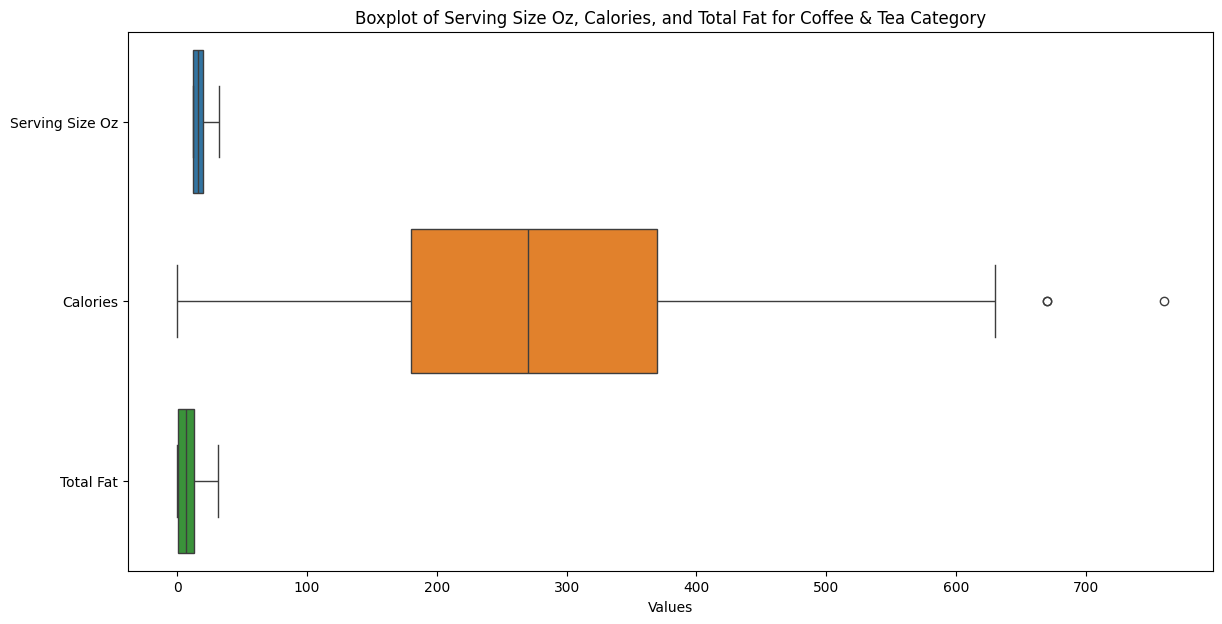

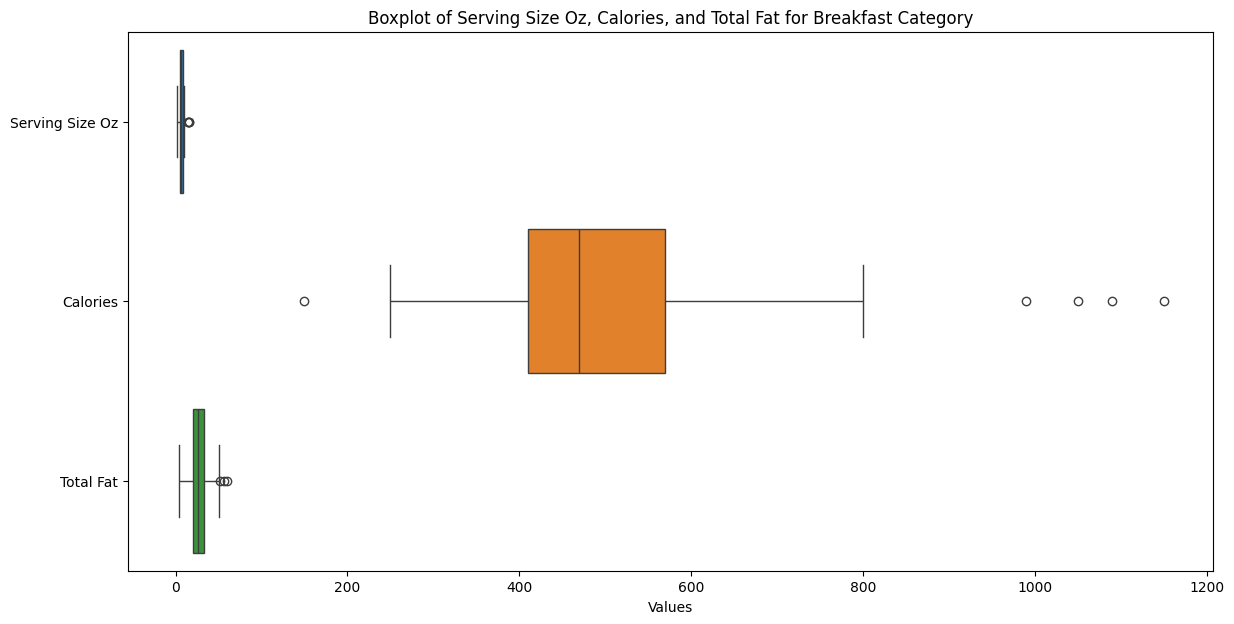

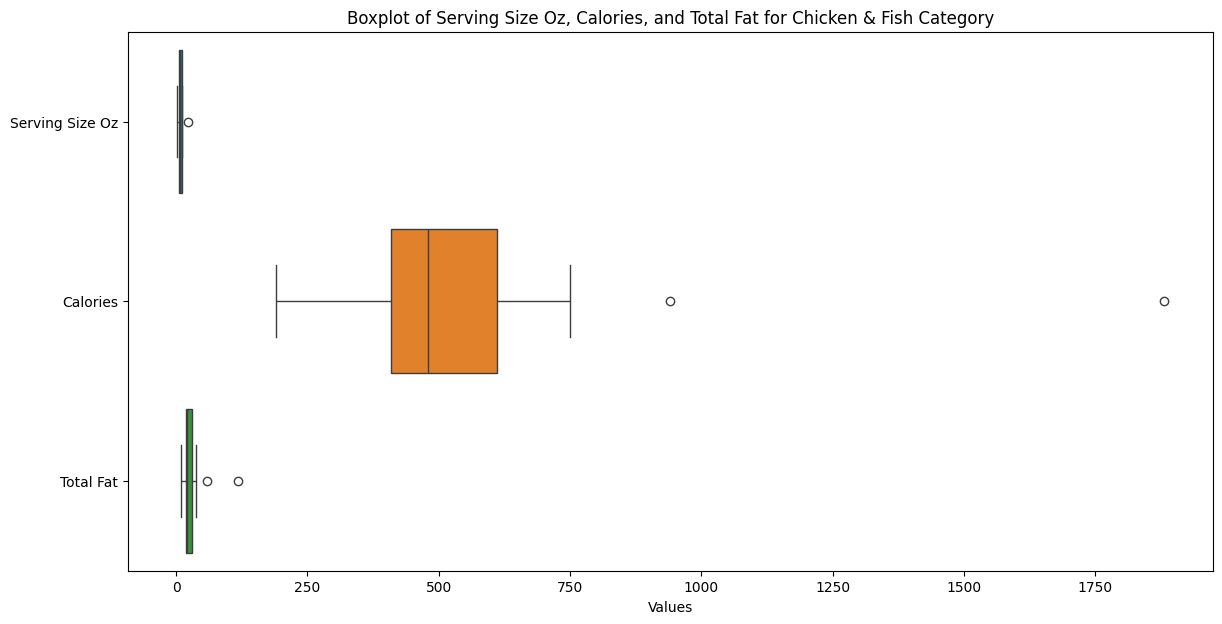

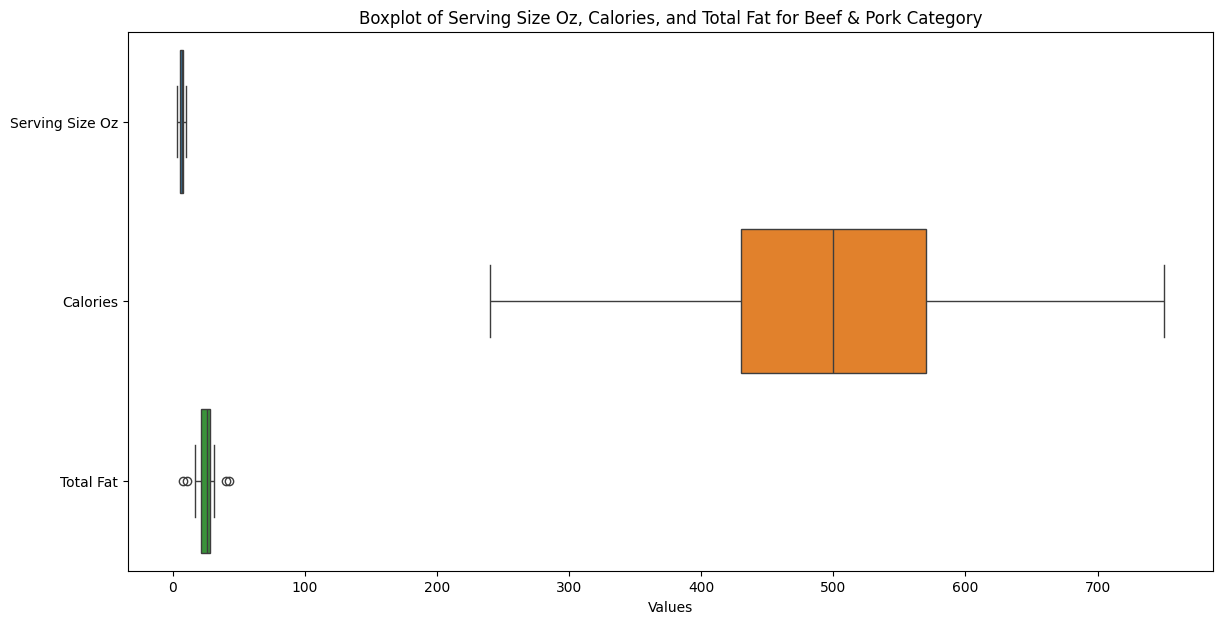

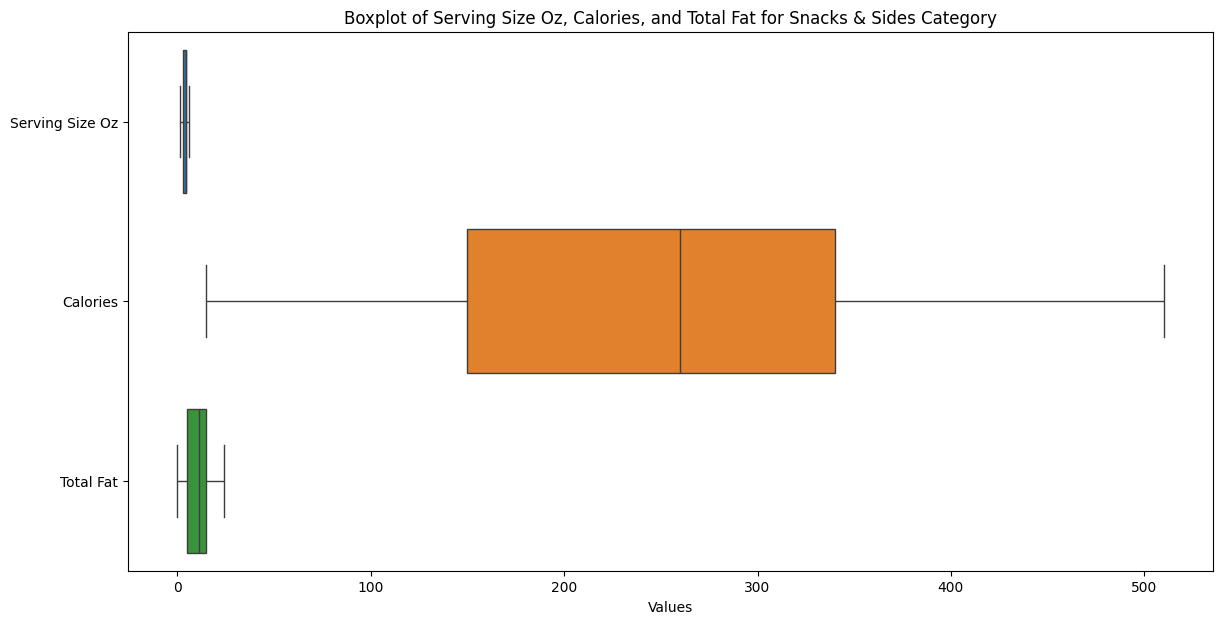

In [175]:
for category in categories:
    category_data = df[df['Category'] == category]
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=category_data[['Serving Size Oz', 'Calories', 'Total Fat']], orient='h')
    plt.xlabel('Values')
    plt.title(f'Boxplot of Serving Size Oz, Calories, and Total Fat for {category} Category')
    plt.show()

## Visualisasi Histogram

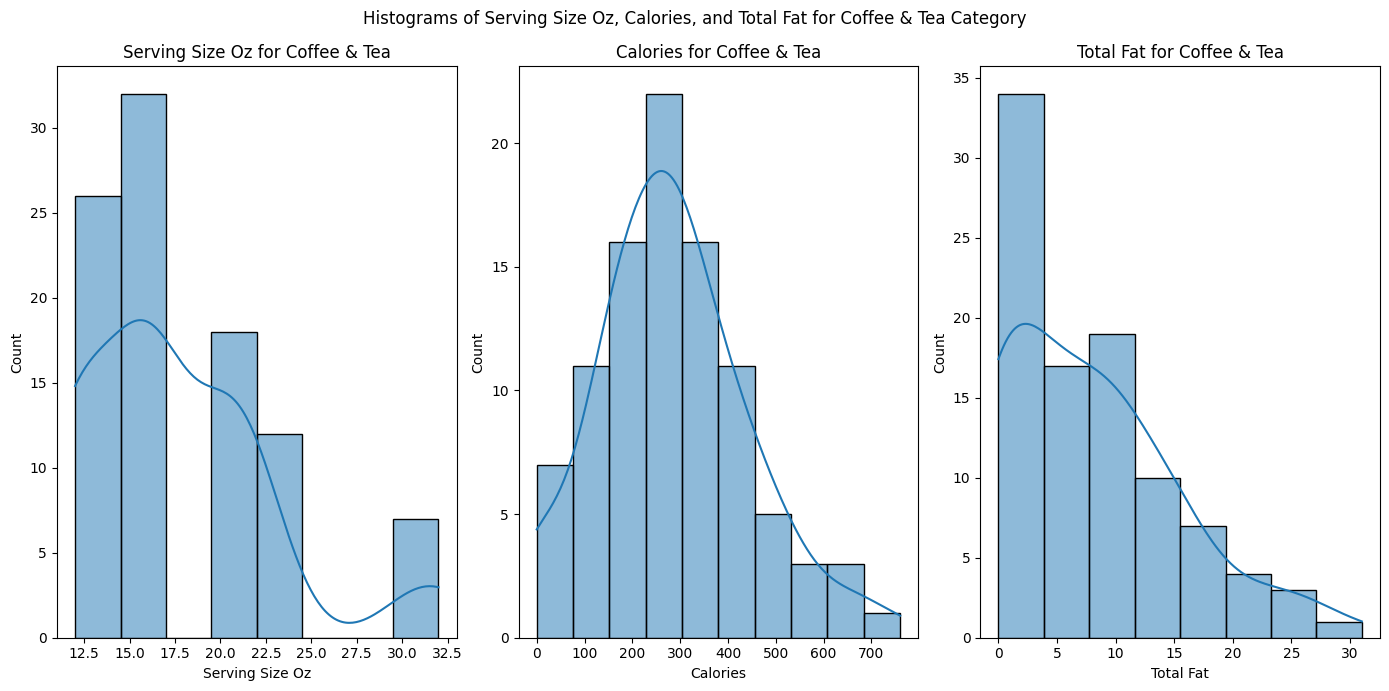

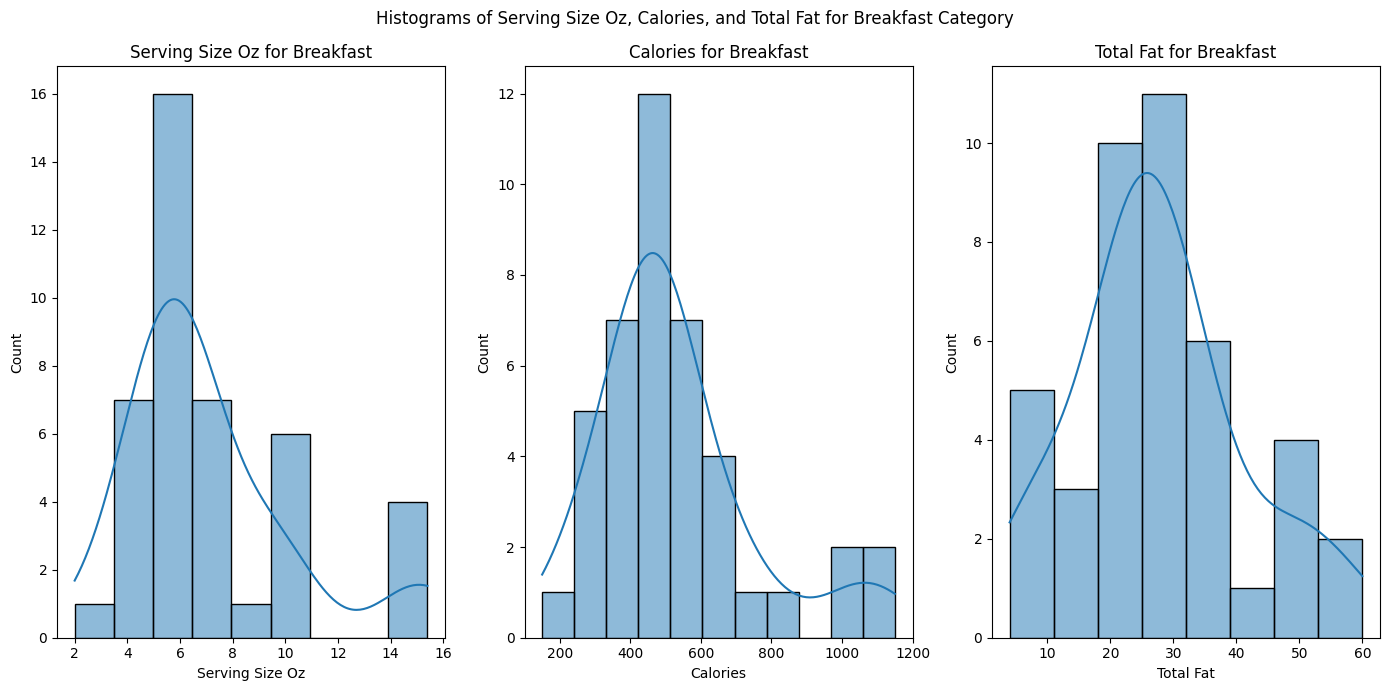

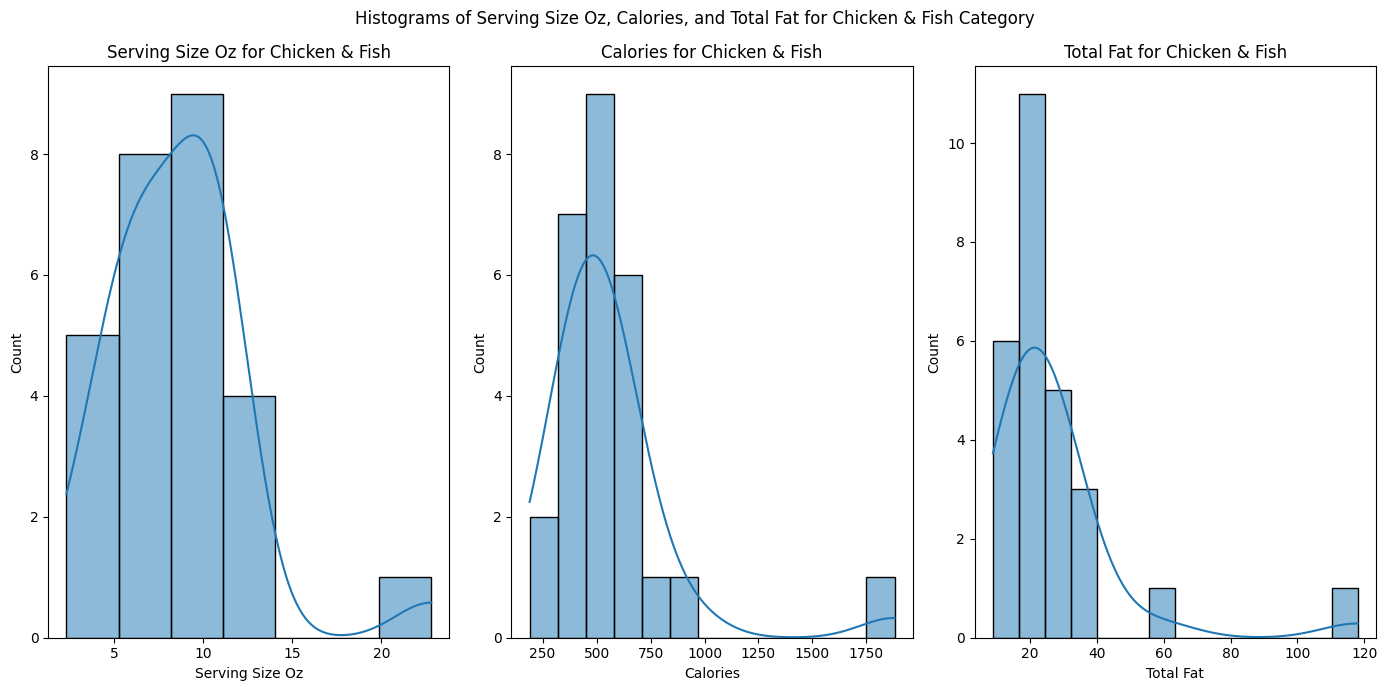

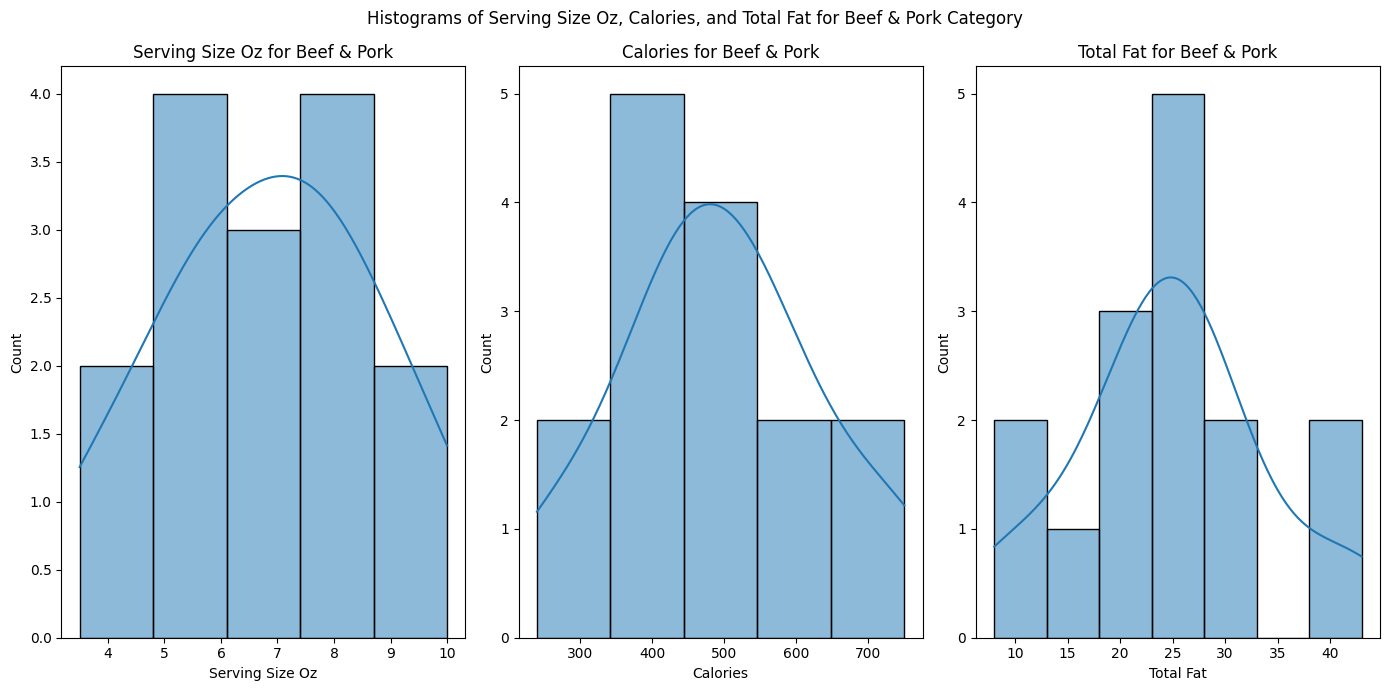

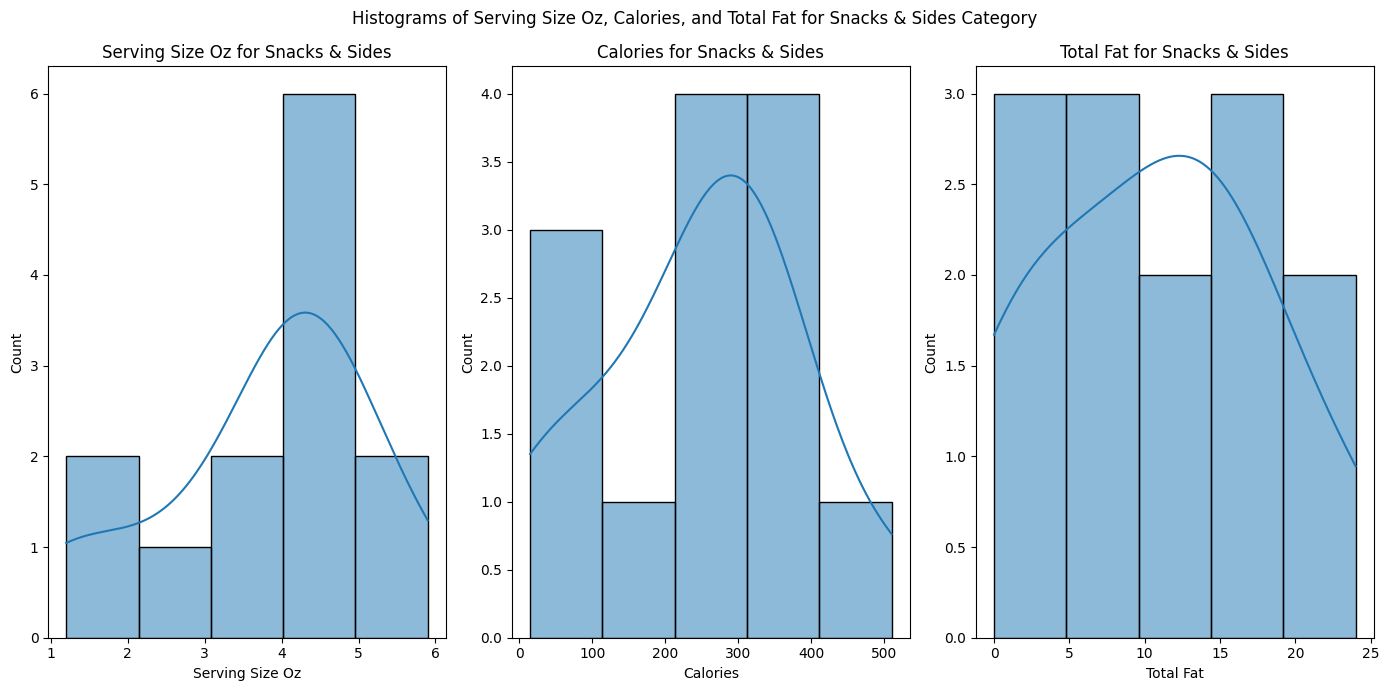

In [176]:
for category in categories:
    category_data = df[df['Category'] == category]
    
    plt.figure(figsize=(14, 7))
    
    # Plot histogram for Serving Size Oz
    plt.subplot(1, 3, 1)
    sns.histplot(category_data['Serving Size Oz'], kde=True)
    plt.title(f'Serving Size Oz for {category}')
    plt.xlabel('Serving Size Oz')
    
    # Plot histogram for Calories
    plt.subplot(1, 3, 2)
    sns.histplot(category_data['Calories'], kde=True)
    plt.title(f'Calories for {category}')
    plt.xlabel('Calories')
    
    # Plot histogram for Total Fat
    plt.subplot(1, 3, 3)
    sns.histplot(category_data['Total Fat'], kde=True)
    plt.title(f'Total Fat for {category}')
    plt.xlabel('Total Fat')
    
    plt.suptitle(f'Histograms of Serving Size Oz, Calories, and Total Fat for {category} Category')
    plt.tight_layout()
    plt.show()

# Soal 4

## Visualisasi Bar chart

<Figure size 1500x800 with 0 Axes>

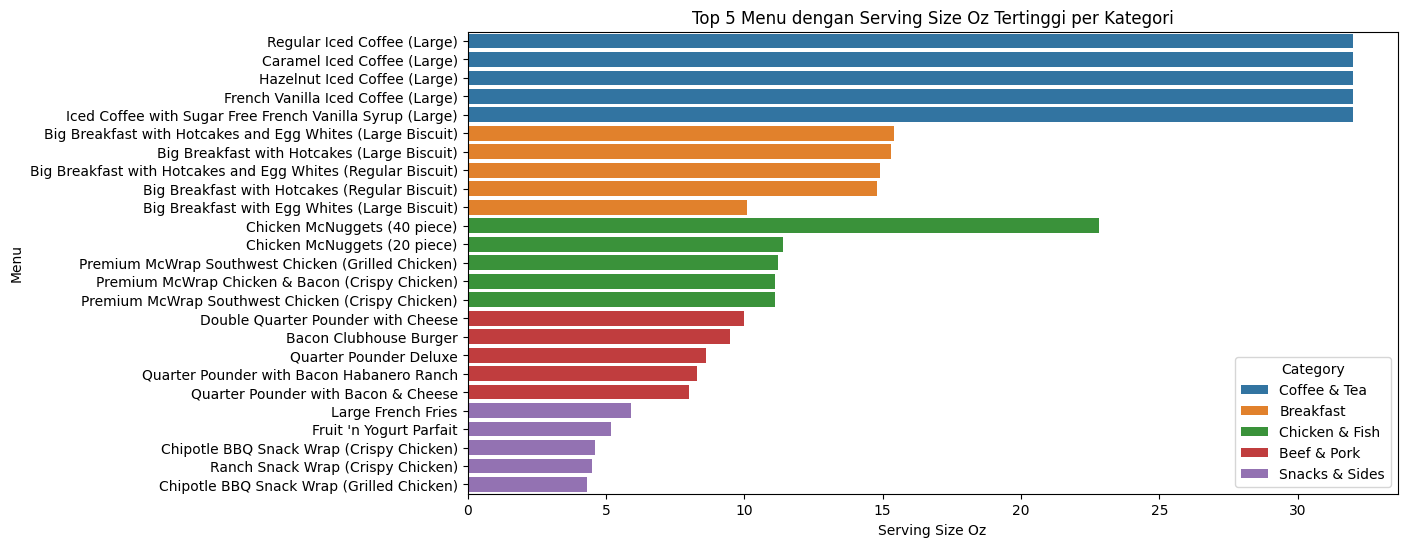

<Figure size 1500x800 with 0 Axes>

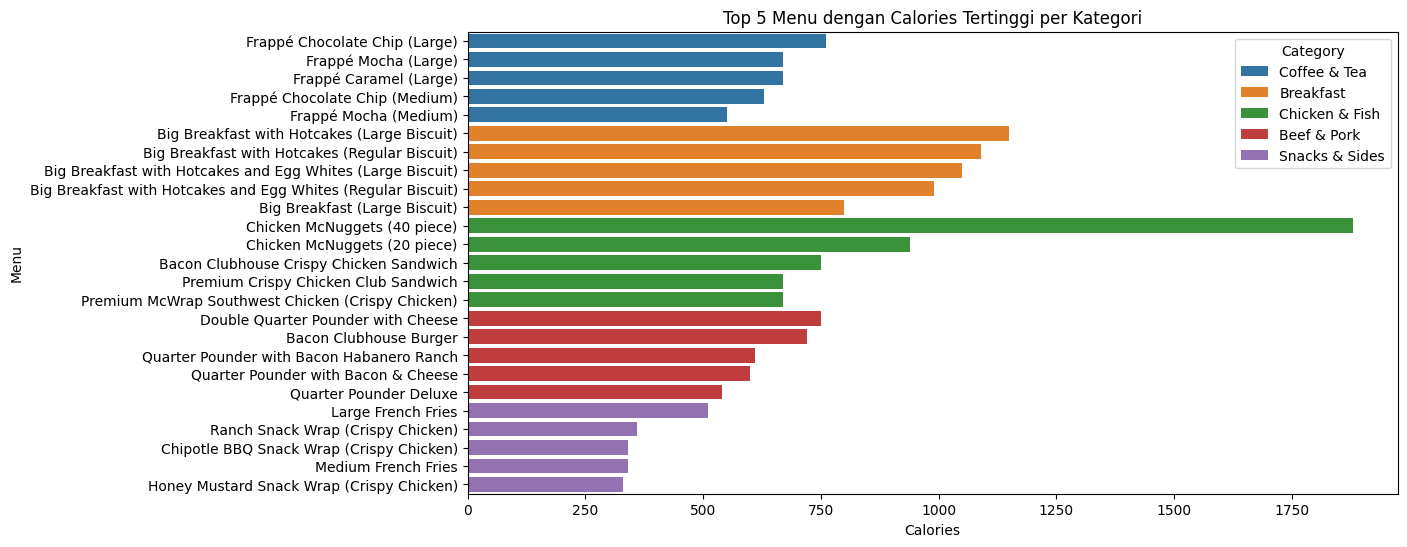

<Figure size 1500x800 with 0 Axes>

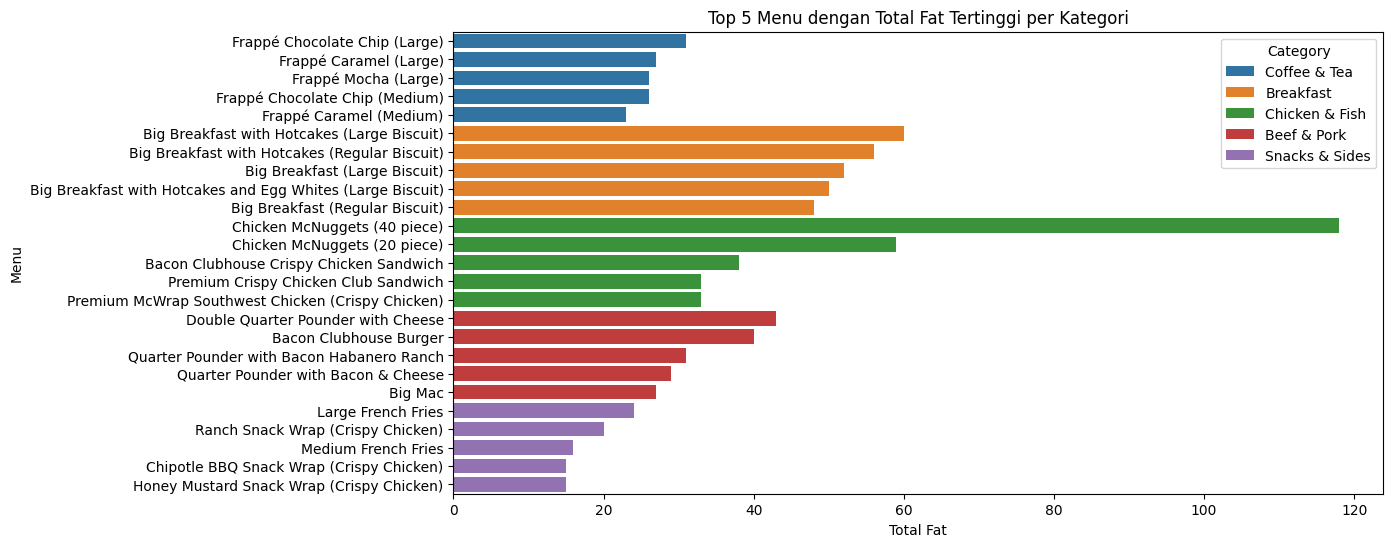

In [177]:
for feature in metrics:
    plt.figure(figsize=(15, 8))
    
    top_menus = pd.DataFrame()
    
    for cat in categories:
        df_cat = df[df["Category"] == cat]
        
        top5 = df_cat.nlargest(5, feature)[["Item", feature, "Category"]]
        
        top_menus = pd.concat([top_menus, top5])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y="Item", hue="Category", data=top_menus, dodge=False)
    
    plt.title(f"Top 5 Menu dengan {feature} Tertinggi per Kategori")
    plt.xlabel(feature)
    plt.ylabel("Menu")
    plt.legend(title="Category")
    plt.show()